# Cytometry data analysis (FCY1-mEGFP)

## Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'
import seaborn as sns
import numpy as np

## Specify filepaths

In [2]:
source = 'data/20210309_AllFCS.csv'
graph_outpath = 'graphs/'

## Get cytometry data

In [3]:
source_df = pd.read_csv(source, header=0)
source_df.head(2)

,medium,strain,background,conc_5FC,well,file_fcs,presence,file,no,FSC.HLin,...,YEL.B.HLin,RED.B.HLin,NIR.B.HLin,YEL.G.HLin,ORG.G.HLin,RED.G.HLin,NIR.G.HLin,BLU.V.ALin,BLU.V.W,TIME
0,SC_complete,control,LL13_ho_mat_a,1.56,A01,1,1,2021-03-09_at_04-22-49pm-1.fcs,1,38961.582031,...,15.912092,18.305073,41.063065,10.959607,15.403275,17.157923,30.892895,64.361732,1155.323242,131.0
1,SC_complete,control,LL13_ho_mat_a,1.56,A01,1,1,2021-03-09_at_04-22-49pm-1.fcs,1,14866.583984,...,13.349505,13.957002,31.898193,10.962691,19.418303,13.824401,30.380995,43.485134,-42997.734375,218.0


## SSC / FSC

C:\Users\duran\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\duran\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\duran\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\duran\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\duran\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value enco

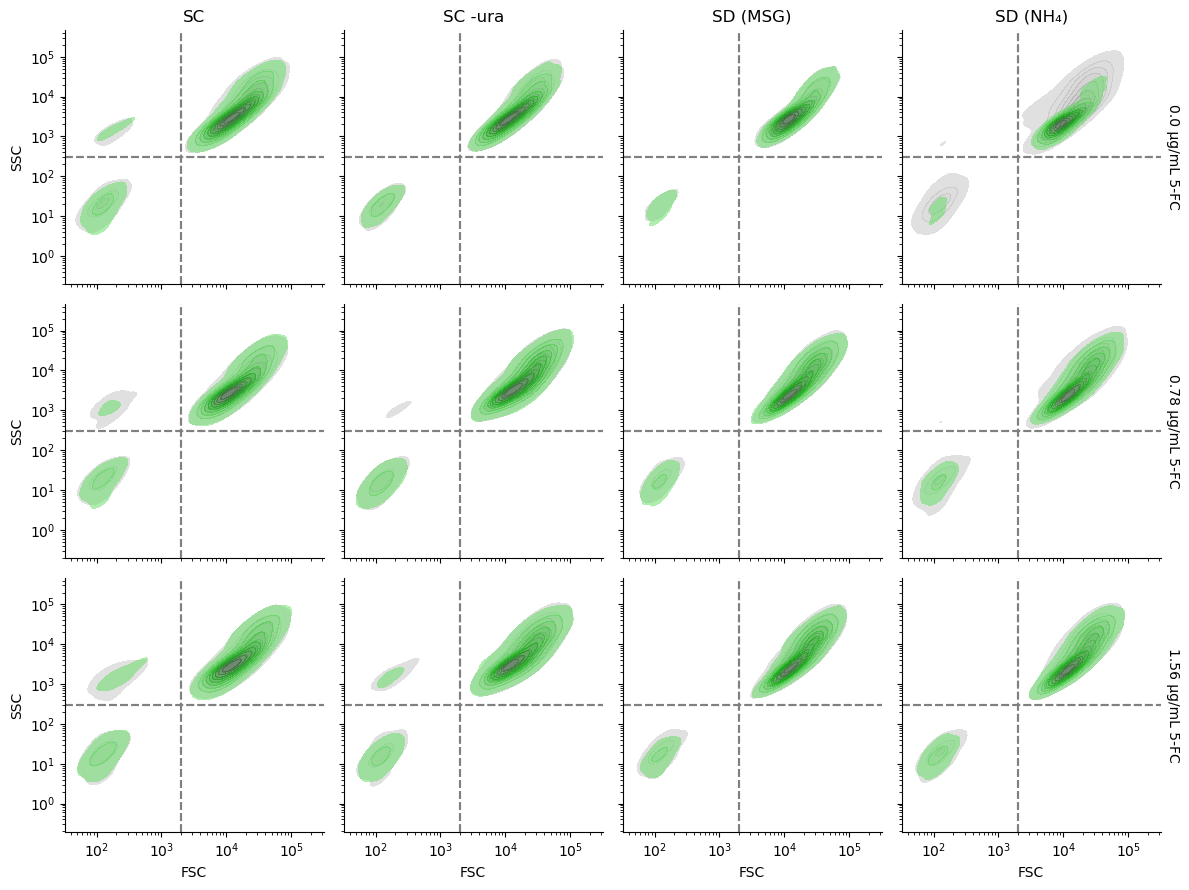

In [21]:
medium_order = ['SC_complete', 'SC_ura', 'SD_MSG', 'SD_NH4']
grid = sns.FacetGrid(source_df, row='conc_5FC', col='medium', col_order = medium_order,
                     hue = 'strain', hue_order = ['control', 'FCY1-GFP'], palette=['grey', 'green'],
                     margin_titles=True, legend_out=True)
grid.map(sns.kdeplot, 'FSC.HLin', 'SSC.HLin', log_scale=True, fill=True, alpha=.5)
grid.map(plt.axvline, x=2000, ls='--', c='grey')
grid.map(plt.axhline, y=300, ls='--', c='grey')
grid.set_titles(row_template='{row_name} μg/mL 5-FC')

medium_labels = ['SC', 'SC -ura', 'SD (MSG)', 'SD (NH₄)']
for i, v in enumerate(medium_order):
    grid.axes[0][i].set_title(medium_labels[i]) # Note: not the same font size as classic set_titles

grid.set_axis_labels('FSC', 'SSC')
plt.tight_layout()

In [4]:
source_df.drop(source_df[(source_df['SSC.HLin'] < 300) | (source_df['FSC.HLin'] < 2000)].index, inplace=True)

## Normalization

In [5]:
source_df['NormGrnB']=source_df['GRN.B.HLin']/source_df['FSC.HLin']

## Get percentage of fluorescent cells

In [6]:
def get_perc(g, channel1, gate):
    tot = len(g)
    gated = len(g[g[channel1] > gate])
    return 100*gated/tot

In [7]:
percdf = source_df.groupby(['medium', 'strain', 'conc_5FC', 'well']).apply(lambda x: get_perc(x, 'NormGrnB', 0.008)).reset_index(name='perc_pos')
percdf

,medium,strain,conc_5FC,well,perc_pos
0,SC_complete,FCY1-GFP,0.00,A06,99.168726
1,SC_complete,FCY1-GFP,0.78,A04,99.374302
2,SC_complete,FCY1-GFP,1.56,A02,99.635867
3,SC_complete,control,0.00,A05,1.730503
4,SC_complete,control,0.78,A03,0.594286
5,SC_complete,control,1.56,A01,1.109827
6,SC_ura,FCY1-GFP,0.00,B06,99.464525
7,SC_ura,FCY1-GFP,0.78,B04,98.849797
8,SC_ura,FCY1-GFP,1.56,B02,97.224073
9,SC_ura,control,0.00,B05,1.594073


C:\Users\duran\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\duran\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\duran\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\duran\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\duran\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value enco

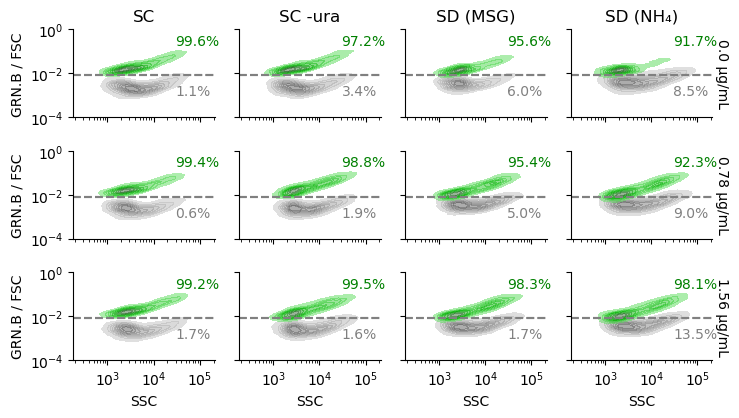

In [11]:
medium_order = ['SC_complete', 'SC_ura', 'SD_MSG', 'SD_NH4']
grid = sns.FacetGrid(source_df, row='conc_5FC', col='medium', col_order = medium_order,
                     hue = 'strain', hue_order = ['control', 'FCY1-GFP'], palette=['grey', 'green'],
                     margin_titles=True, legend_out=True,
                     height=1.43, aspect=1.31
                    )
grid.map(sns.kdeplot, 'SSC.HLin', 'NormGrnB', log_scale=True, fill=True, alpha=.5)
grid.map(plt.axhline, y=0.008, ls='--', c='grey')
grid.set(ylim=(0.0001,1))
grid.set_titles(row_template='{row_name} μg/mL')

medium_labels = ['SC', 'SC -ura', 'SD (MSG)', 'SD (NH₄)']
for i, v in enumerate(medium_order):
    grid.axes[0][i].set_title(medium_labels[i]) # Note: not the same font size as classic set_titles
    for j, w in enumerate(source_df.conc_5FC.unique()):
        ctr_val = percdf.loc[(percdf.medium == v)
                             & (percdf.conc_5FC == w)
                             & (percdf.strain == 'control'),
                             'perc_pos'].values[0]
        gfp_val = percdf.loc[(percdf.medium == v)
                             & (percdf.conc_5FC == w)
                             & (percdf.strain == 'FCY1-GFP'),
                             'perc_pos'].values[0]
        grid.axes[j][i].annotate('{:.1f}%'.format(ctr_val), (30000, 0.001), color='grey')
        grid.axes[j][i].annotate('{:.1f}%'.format(gfp_val), (30000, 0.2), color='green')

grid.set_axis_labels('SSC', 'GRN.B / FSC')
#grid.fig.subplots_adjust(top=0.82)
#grid.fig.suptitle('Normalized fluorescence')
plt.tight_layout()
plt.savefig(graph_outpath+'20230406_Normalized_GrnB_SSC.png', format='png', dpi=300)
plt.savefig(graph_outpath+'20230406_Normalized_GrnB_SSC.svg', format='svg', dpi=300)